In [2]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from lmfit import Model

import os
spec_dir = os.path.abspath("./../spec/") + "/"
plots_dir = os.path.abspath("./../plots/temp") + "/"

import sys
module_path = os.path.abspath("./../../module")
sys.path.append(module_path)
import redh3p as rhp

import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter("ignore", category=AstropyWarning)

##################

h3p_wave_to_fit = fits.open("h3p_wave_to_fit.fits", ignore_missing_end=True)[0].data
h2_wave_to_fit = fits.open("h2_wave_to_fit.fits", ignore_missing_end=True)[0].data

[h3ppy]  Spectrum parameters:
         Temperature    = 905.5 +/- 14.1 [K]
         Column density = 9.28E+23 +/-  1.40E+23 [m-2]
         ------------------------------
         background_0 = 1.04E-04 +/- 4.40E-06
         offset_0 = -4.77E-07 +/- 7.98E-07
         sigma_0 = 6.29E-05 +/- 8.53E-07



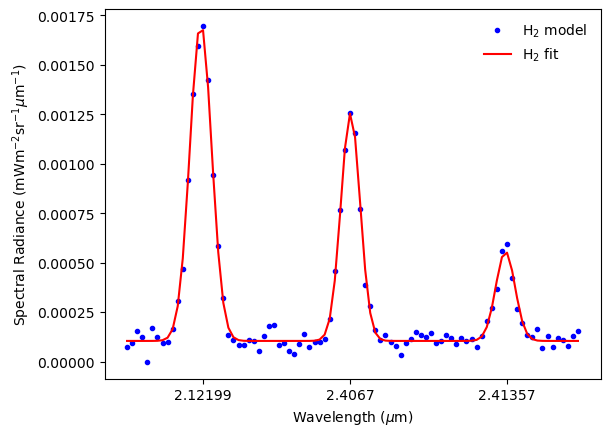

In [5]:
import h3ppy

h2 = h3ppy.h2()

wave = h2_wave_to_fit
# wave = h2.wavegen(2.11, 2.42, 2000)

h2_centers = [2.12199, 2.4067, 2.41357]

# h2_cpos = np.arange(3) * 30 + 15
h2_cpos = np.array([15, 44, 75])

N = 1e24
T = 900
R = 25000

model = h2.model(N = N, T =  T, R = R, wavelength = wave)

noise = np.random.normal(size = model.size) * np.max(model) / 50
pretend_data = model + noise
pretend_data[:30] = pretend_data[:30] + 0.0001
pretend_data[30:] = pretend_data[30:] + 0.0001

h2.set(N = N, T = T, data = pretend_data)

fit = h2.fit()

vars, errs = h2.get_results()

xx = range(len(fit))

fig, ax = plt.subplots()
ax.plot(xx, pretend_data, 'b.', label='H$_2$ model')
ax.plot(xx, fit, 'r-', label='H$_2$ fit')
# Automagically set the labels 
ax.set(xlabel=h2.xlabel(), ylabel=h2.ylabel(label='Spectral Radiance', prefix="m"), xticks=h2_cpos)
ax.set_xticklabels(h2_centers)
ax.legend(frameon=False)

# plt.xlim(2.121, 2.123)


# ax2.plot(h2_x, h2_spec * 1e3, "k.", label="H$_2$ data")
# # ax2.plot(xx, model * 1e3, "-", label="H2 Model")
# ax2.plot(h2_x, h2_fit * 1e3, 'r-', label="H$_2$ fit")
# ax2.set(xlabel=h2.xlabel(), ylabel=h2.ylabel(label='Spectral Radiance', prefix="m"), xticks=h2_cpos)
# ax2.set_xticklabels(h2_centers)
# ax2.legend(frameon=False)

In [46]:
pretend_data.shape

(90,)

In [8]:
0.288 * 60 * 314.2 / ()

5429.375999999999

In [9]:
0.375 * 120 * 32.17

1447.65

/Users/RuoyanWang/anaconda3/lib/python3.11/site-packages/h3ppy


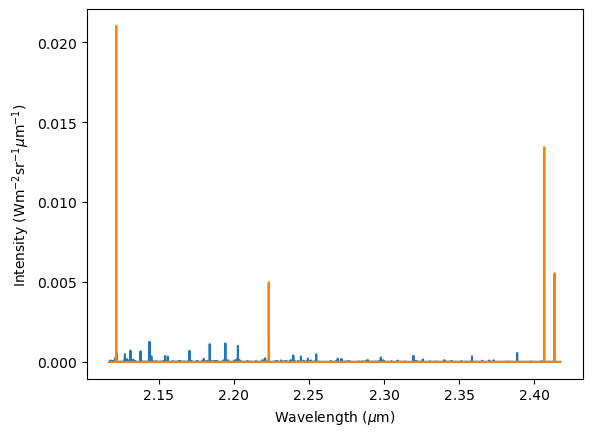

In [17]:
import h3ppy
import matplotlib.pyplot as plt
import numpy as np

# Create the H3+ object
h3p = h3ppy.h3p()
h2 = h3ppy.h2()

# Define a wavelength range, e.g. typical of an observation of the H3+ Q branch
# Specify the start and end wavelengths, and the number of wavelength elements

x=0.008
wave = h3p.wavegen(1.95, 2.15, 1024)
wave3 = h3p.wavegen(3.478+x, 3.543+x, 10240)


wave2 = h3p.wavegen(3.327+x, 3.389+x, 10240)
wave = h3p.wavegen(3.189+x, 3.250+x, 10240)
wave = h3p.wavegen(3.9, 4.8, 10240)



wave = h3p.wavegen(2.1172, 2.41721, 102400)
# wave = h3p.wavegen(1.972,2.624, 102400)
# wave = h3p.wavegen(1.972,3.624, 102400)

# x=0.18
# wave = h3p.wavegen(3.83-x, 4.18-x, 10240)

# Create a H3+ model spectrum for a set of physical parameters 
# Spectral resolution R = 1200, T = 1000, N = 1e14
# This is the minimum set of parameters required for generating a model
resolution=120000

# model = h3p.model(density = 1e15, temperature = 600, R = resolution, wavelength = wave3)
# model2 = h3p.model(density = 1e15, temperature = 800, R = resolution, wavelength = wave3)

# # Set up the H2 model
# amagat = 2.76e25
# h2 = h3ppy.h2()
# h2.set(temperature = 800, density = amagat, R = resolution, wavelength = wave3)
# model_h2  = h2.model()


# # Plot the model
# fig, ax = plt.subplots()
# ax.plot(wave3, model2/np.max(model2))
# ax.plot(wave3, model/np.max(model))
# ax.plot(wave3, model_h2 , label = 'H$_2$ model')

# # ax.plot(wave, model2, color='red')
# # Automagically set the labels 
# ax.set_xlabel(h3p.xlabel())
# ax.set_ylabel(h3p.ylabel())
# plt.show()
# plt.close() 



# model = h3p.model(density = 1e15, temperature = 600, R = resolution, wavelength = wave2)
# model2 = h3p.model(density = 1e15, temperature = 800, R = resolution, wavelength = wave2)
# # Set up the H2 model
# amagat = 5e25
# h2 = h3ppy.h2()
# h2.set(temperature = 800, density = amagat, R = resolution, wavelength = wave2)
# model_h2  = h2.model()


# # Plot the model
# fig, ax = plt.subplots()
# ax.plot(wave2, model2/np.max(model2))
# ax.plot(wave2, model/np.max(model))
# ax.plot(wave2, model_h2 , label = 'H$_2$ model')

# # ax.plot(wave, model2, color='red')
# # Automagically set the labels 
# ax.set_xlabel(h3p.xlabel())
# ax.set_ylabel(h3p.ylabel())
# plt.show()
# plt.close() 


t2=1000

# model = h3p.model(density = 1e14, temperature = 1000, R = resolution, wavelength = wave-(wave/(resolution*1.5)))
# model2 = h3p.model(density = 1e14, temperature = 1000, R = resolution, wavelength = wave)
model = h3p.model(density = 1e15, temperature = 600, R = resolution, wavelength = wave)
model2 = h3p.model(density = 1e15, temperature = t2, R = resolution, wavelength = wave)
# Set up the H2 model
amagat = 1e24
h2 = h3ppy.h2()
h2.set(temperature = t2, density = amagat, R = resolution, wavelength = wave)
model_h2  = h2.model()


# Plot the model
fig = plt.figure()
ax=plt.subplot(111)
# ax2=plt.subplot(122)
# ax.plot(wave, model2)
ax.plot(wave, model2)
ax.plot(wave, model_h2 , label = 'H$_2$ model')

# ax2.plot(wave, model2 , label = 'H$_3^+$ model')



# ax.plot(wave, model2, color='red')
# Automagically set the labels 
ax.set_xlabel(h3p.xlabel())
ax.set_ylabel(h3p.ylabel())
# plt.savefig('example_model.png')
plt.show()
plt.close() 






In [2]:
# Generate some noise to add to the model  
noise = np.random.normal(size = model.size) * np.max(model) / 10
pretend_data = model + noise

# Set the initial guess for the data. I'm making it different from the model input
# to show that the fit actually can converge on 'real' values
h3p.set(density = 1e13, temperature = 1300, data = pretend_data)

# Let h3ppy make an initial guess at the density
h3p.guess_density()

# Fit temperature and density to the pretend data
fit = h3p.fit(temperature = 1300)

# Get the fit variables and associated errors
vars, errs = h3p.get_results()

# Plot the model
fig, ax = plt.subplots()
ax.plot(wave, pretend_data, label='Pretend data')
ax.plot(wave, fit, label = '$H_3^+$ spectrum fit')
ax.legend()
# Automagically set the labels 
ax.set_xlabel(h3p.xlabel())
ax.set_ylabel(h3p.ylabel())
plt.show()
plt.close() 

print(vars)
print(errs)

NameError: name 'np' is not defined

In [5]:
# This function sub-divides data centered on a list of wavelengths
def subdivide(wave, spec, middles, width = 20) : 
    ret = []
    for m in middles : 
        centre = np.abs(wave - m).argmin()
        for i in range(centre - width, centre + width) : 
            ret.append(spec[i])
    return np.array(ret)
    
# The H3+ line centeres contained withing this spectral band
centers = [3.953, 3.971, 3.986, 3.9945]
cpos = np.arange(4) * 41 + 20

# Create sub-arrays, focusing on where the H3+ lines are

wave = h3p.wavegen(3.4, 4.1, 10240)

subwave = subdivide(wave, wave, centers)


print(subwave)

# Set the wavelength and the data
# h3p.set(wavelength = subwave, data = subspec, R = 20000)

# # Create a x scale for plotting 
# xx      = range(len(subspec))

# # Guess the density and proceed with a five parameter fit
# h3p.guess_density()
# fit = h3p.fit()
# vars, errs = h3p.get_results()

# # Plot the fit
# fig, ax = plt.subplots()
# ax.plot(xx, subspec * 1e3, '.', label = 'Observation')
# ax.plot(xx, fit * 1e3, label = 'h3ppy H$_3^+$ fit')
# ax.set(xlabel = h3p.xlabel(), ylabel = h3p.ylabel(prefix = 'm'), xticks = cpos, title=title)
# ax.set_xticklabels(centers)
# ax.legend(frameon = False)
# plt.tight_layout()
# # plt.savefig('../img/nirspec_jupiter_fit.png')
# plt.close()

[3.95166016 3.95172852 3.95179688 3.95186523 3.95193359 3.95200195
 3.95207031 3.95213867 3.95220703 3.95227539 3.95234375 3.95241211
 3.95248047 3.95254883 3.95261719 3.95268555 3.95275391 3.95282227
 3.95289063 3.95295898 3.95302734 3.9530957  3.95316406 3.95323242
 3.95330078 3.95336914 3.9534375  3.95350586 3.95357422 3.95364258
 3.95371094 3.9537793  3.95384766 3.95391602 3.95398438 3.95405273
 3.95412109 3.95418945 3.95425781 3.95432617 3.96963867 3.96970703
 3.96977539 3.96984375 3.96991211 3.96998047 3.97004883 3.97011719
 3.97018555 3.97025391 3.97032227 3.97039063 3.97045898 3.97052734
 3.9705957  3.97066406 3.97073242 3.97080078 3.97086914 3.9709375
 3.97100586 3.97107422 3.97114258 3.97121094 3.9712793  3.97134766
 3.97141602 3.97148438 3.97155273 3.97162109 3.97168945 3.97175781
 3.97182617 3.97189453 3.97196289 3.97203125 3.97209961 3.97216797
 3.97223633 3.97230469 3.98460938 3.98467773 3.98474609 3.98481445
 3.98488281 3.98495117 3.98501953 3.98508789 3.98515625 3.98522

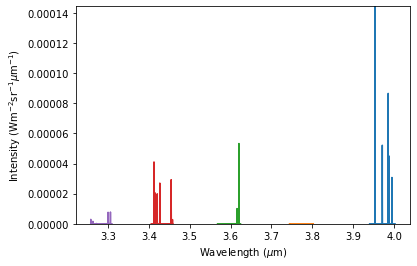

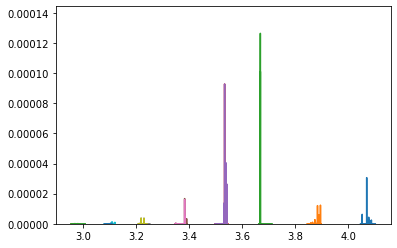

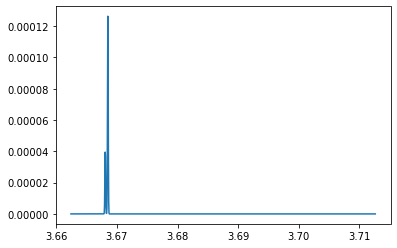

In [6]:
resolution=25000
temp=450
dx=0

h3p = h3ppy.h3p()

wave = h3p.wavegen(3.94013+dx, 4.0024+dx, 1024)
model = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
maxint=np.max(model)



# Plot the model
fig, ax = plt.subplots()
ax.plot(wave, model)
ax.set_ylim([0,maxint])
# ax.plot(wave, model2, color='red')
# Automagically set the labels 
ax.set_xlabel(h3p.xlabel())
ax.set_ylabel(h3p.ylabel())


h3p = h3ppy.h3p()

wave = h3p.wavegen(3.7443+dx, 3.80231+dx, 1024)
model1 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)

ax.plot(wave, model1)

h3p = h3ppy.h3p()

wave = h3p.wavegen(3.56822+dx, 3.62440+dx, 1024)
model2 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax.plot(wave, model2)

h3p = h3ppy.h3p()

wave = h3p.wavegen(3.40603+dx, 3.45865+dx, 1024)
model3 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax.plot(wave, model3)

h3p = h3ppy.h3p()

wave = h3p.wavegen(3.258+dx,3.31+dx, 1024)
model4 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax.plot(wave, model4)


fig, ax2 = plt.subplots()
ax2.set_ylim([0,maxint])


h3p = h3ppy.h3p()
wave = h3p.wavegen(4.0463+dx,4.102+dx, 1024)
model5 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model5)



h3p = h3ppy.h3p()
wave = h3p.wavegen(3.8448+dx,3.898+dx, 1024)
model5 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model5)

h3p = h3ppy.h3p()
wave = h3p.wavegen(3.6624+dx,3.7127+dx, 1024)
model6 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model6)

h3p = h3ppy.h3p()
wave = h3p.wavegen(3.4974+dx,3.5466+dx, 2000)
model7 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model7)
h3p = h3ppy.h3p()
wave = h3p.wavegen(3.4974+dx,3.543+dx, 5000)
model8 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model8)

h3p = h3ppy.h3p()
wave = h3p.wavegen(3.346+dx,3.3924+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)
h3p = h3ppy.h3p()
wave = h3p.wavegen(3.346+dx,3.385+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)

h3p = h3ppy.h3p()
wave = h3p.wavegen(3.208+dx,3.2516+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)
h3p = h3ppy.h3p()
wave = h3p.wavegen(3.208+dx,3.2414+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)

h3p = h3ppy.h3p()
wave = h3p.wavegen(3.08+dx,3.121+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)
h3p = h3ppy.h3p()
wave = h3p.wavegen(3.08+dx,3.109+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)

h3p = h3ppy.h3p()
wave = h3p.wavegen(2.954+dx,2.988+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)
h3p = h3ppy.h3p()
wave = h3p.wavegen(2.954+dx,3.008+dx, 1024)
model9 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model9)


fig, ax2 = plt.subplots()
h3p = h3ppy.h3p()
wave = h3p.wavegen(3.6624+dx,3.7127+dx, 1024)
model6 = h3p.model(density = 1e15, temperature = temp, R = resolution, wavelength = wave)
ax2.plot(wave, model6)



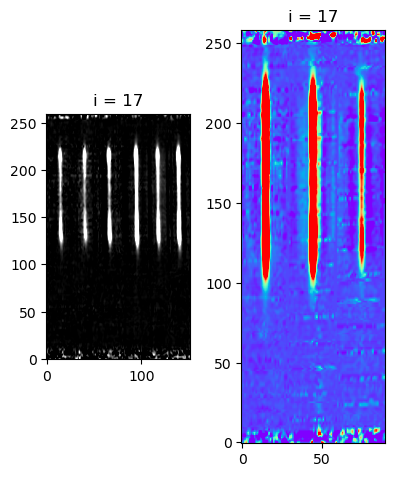

In [4]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from lmfit import Model

import os
spec_dir = os.path.abspath("./../spec/") + "/"
plots_dir = os.path.abspath("./../plots/temp") + "/"

import sys
module_path = os.path.abspath("./../../module")
sys.path.append(module_path)
import redh3p as rhp

import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter("ignore", category=AstropyWarning)

##################

h3p_spec_to_fit = fits.open("h3p_spec_to_fit.fits", ignore_missing_end=True)[0].data
h3p_wave_to_fit = fits.open("h3p_wave_to_fit.fits", ignore_missing_end=True)[0].data

h2_wave_to_fit = fits.open("h2_wave_to_fit.fits", ignore_missing_end=True)[0].data
h2_spec_to_fit_smoothed = fits.open("h2_spec_to_fit_smoothed.fits", ignore_missing_end=True)[0].data
h2_spec_to_fit_vel = fits.open("h2_spec_to_fit_vel.fits", ignore_missing_end=True)[0].data

for i in range(len(h2_spec_to_fit_smoothed)):
    a = h2_spec_to_fit_smoothed[i][166][0:30]
    b = h2_spec_to_fit_smoothed[i][167][0:30]
    c = h2_spec_to_fit_smoothed[i][171][0:30]
    d = h2_spec_to_fit_smoothed[i][172][0:30]
    f = np.median((a, b, c, d), axis=0)
    h2_spec_to_fit_smoothed[i][168][0:30] = f * 1
    h2_spec_to_fit_smoothed[i][169][0:30] = f * 1
    h2_spec_to_fit_smoothed[i][170][0:30] = f * 1


for i in range(17,18):

    fig = plt.figure(figsize=(6, 6), tight_layout=True)

    fig.add_subplot(131)
    plt.imshow(h3p_spec_to_fit[i],
               # extent=[waverange36[0],waverange36[1001],30,240],
               aspect="equal",
               cmap="gist_gray",
               # norm=colors.PowerNorm(gamma=0.4),
               vmin=0,
               vmax=0.001,
               origin="lower",
              )
    plt.title('i = '+str(i))


    fig.add_subplot(132)
    plt.imshow(h2_spec_to_fit_smoothed[i],
    #            extent=[waverange36[0],waverange36[1001],30,240],
               aspect='equal',
               cmap='rainbow',
               vmax=0.001,
               vmin=-0.0001,
               # norm=colors.PowerNorm(gamma=0.8),
               origin='lower',
              )
    plt.title('i = '+str(i))

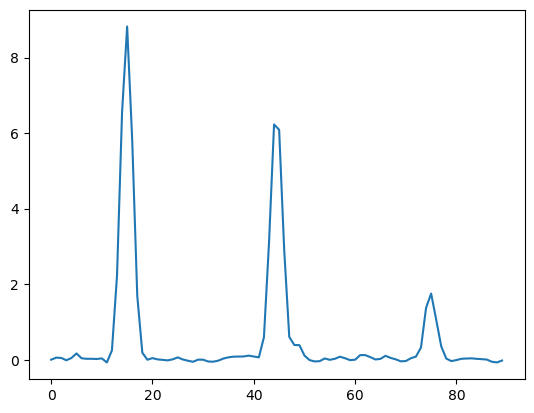

In [5]:
plt.plot(h2_spec_to_fit_smoothed[17][200] * 1e3)

[h3ppy]  Spectrum parameters:
         Temperature    = 857.0 +/- 14.6 [K]
         Column density = 4.37E+16 +/-  5.74E+15 [m-2]
         ------------------------------
         background_0 = 0.00E+00
         offset_0 = 0.00E+00
         sigma_0 = 3.40E-05

[h3ppy]  Spectrum parameters:
         Temperature    = 698.1 +/- 21.1 [K]
         Column density = 3.20E+25 +/-  1.21E+25 [m-2]
         ------------------------------
         background_0 = 0.00E+00
         offset_0 = 0.00E+00
         sigma_0 = 3.69E-05



/opt/anaconda3/lib/python3.11/site-packages/h3ppy


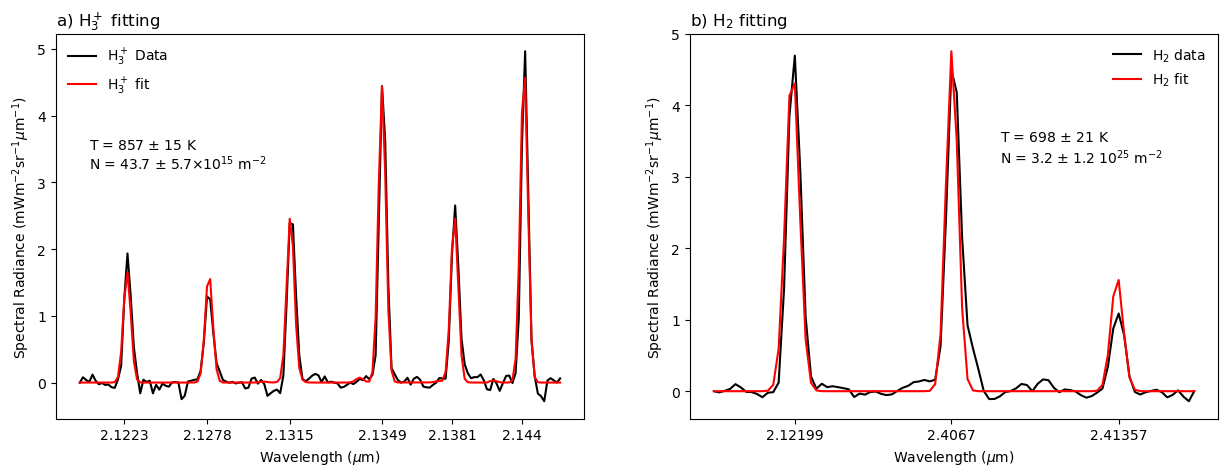

In [16]:
import h3ppy

h3p_centers = [2.1223, 2.1278, 2.1315, 2.1349, 2.1381, 2.144]
h3p_cpos = np.arange(6) * 25 + 16
h3p_cpos = np.array([14, 40, 66, 95, 117, 139])
h2_centers = [2.12199, 2.4067, 2.41357]
h2_cpos = np.arange(3) * 30 + 15
h2_cpos = np.array([15, 44, 75])

h3p = h3ppy.h3p(line_list_file="h3p_line_list_neale_1996_subset_211_215.txt")
h2 = h3ppy.h2()

h3p_spec = h3p_spec_to_fit[17][140]
h2_spec = h2_spec_to_fit_smoothed[17][140]

h3p_model = h3p.model(N=3e16, T=1000, R=25000, wavelength=h3p_wave_to_fit)
h2_model = h2.model(N=1e26, T=900, R=25000, wavelength=h2_wave_to_fit)

h3p.set(wavelength=h3p_wave_to_fit, data=h3p_spec, R=25000, N=3e16, T=1000)
h2.set(wavelength=h2_wave_to_fit, data=h2_spec, R=25000, N=1e26, T=900)

h3p_fit = h3p.fit(params_to_fit=["density", "temperature"])
h3p_vars, h3p_errs = h3p.get_results()
h2_fit = h2.fit(params_to_fit=["density", "temperature"])
h2_vars, h2_errs = h2.get_results()

h3p_x = range(len(h3p_spec))
h2_x = range(len(h2_spec))


# h2_centers = [2.12199]
# h2_cpos = np.arange(3) * 30 + 15
# h2_cpos = np.array([25])

# h2_model = Model(rhp.gaussian_fit)

# # create parameters and add initial guess
# h2_params = h2_model.make_params()
# h2_params.add('a0', value=0.03, min=0, max=0.5)
# h2_params.add('a1', value=25, min=22, max=28)
# h2_params.add('a2', value=2, min=0, max=6)
# h2_params.add('a3', value=0)
# h2_params.add('a4', value=0)
# h2_params.add('a5', value=0)

# pixel = np.linspace(0, np.size(h2_spec_to_fit_vel[17],1)-1, np.size(h2_spec_to_fit_vel[17],1))

# h2_sp = h2_spec_to_fit_vel[17][140] - np.median((h2_spec_to_fit_vel[17][140][:3], h2_spec_to_fit_vel[17][140][47:]))

# # perform gaussian fit and test errors
# h2_fit_result = h2_model.fit(h2_sp, h2_params, x=pixel)


# Plot the fit
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(h3p_x, h3p_spec * 1e3, 'k-', label='H$_3^+$ Data')
ax1.plot(h3p_x, h3p_fit * 1e3, 'r-', label='H$_3^+$ fit')
ax1.set(xlabel=h3p.xlabel(), ylabel=h3p.ylabel(label='Spectral Radiance', prefix="m"), xticks=h3p_cpos, xticklabels=h3p_centers)
ax1.legend(loc='best', frameon=False)
ax1.text(3, 3.5, 'T = ' + 
         '{:0.0f}'.format(h3p_vars['temperature']) + 
         r' $\pm$ ' + 
         '{:0.0f}'.format(h3p_errs['temperature']) + 
         ' K'
        )
ax1.text(3, 3.2, 'N = ' + 
         '{:0.1f}'.format(h3p_vars['density']/1e15) + 
         ' $\pm$ ' + 
         '{:0.1f}'.format(h3p_errs['density']/1e15) + 
         r'$\times 10^{15}$' + 
         ' m$^{-2}$'
        )
ax1.set_title('a) H$_3^+$ fitting', loc='left')

ax2 = fig.add_subplot(1,2,2)
# ax2.plot(pixel, h2_sp * 1e3, "k-", label="H$_2$ Data")
# ax2.plot(pixel, h2_fit_result.best_fit * 1e3, 'r-', label="H$_2$ fit")

ax2.plot(h2_x, h2_spec * 1e3, "k-", label="H$_2$ data")
# ax2.plot(xx, model * 1e3, "-", label="H2 Model")
ax2.plot(h2_x, h2_fit * 1e3, 'r-', label="H$_2$ fit")
ax2.set(xlabel=h2.xlabel(), ylabel=h2.ylabel(label='Spectral Radiance', prefix="m"), xticks=h2_cpos)
ax2.set_xticklabels(h2_centers)
ax2.legend(frameon=False)
ax2.text(53, 3.5, 'T = ' + 
         '{:0.0f}'.format(h2_vars['temperature']) + 
         ' $\pm$ ' + 
         '{:0.0f}'.format(h2_errs['temperature']) + 
         ' K'
        )
ax2.text(53, 3.2, 'N = ' + 
         '{:0.1f}'.format(h2_vars['density']/1e25) + 
         ' $\pm$ ' + 
         '{:0.1f}'.format(h2_errs['density']/1e25) + ' $10^{25}$'
         ' m$^{-2}$'
        )
ax2.set_title('b) H$_2$ fitting', loc='left')

plt.savefig(plots_dir+'/h3p_fit.pdf', dpi=300, bbox_inches='tight')

In [17]:
plots_dir

'/Users/ruoyanwang/Documents/leicester/h3p/02jun17/plots/temp/'

In [35]:
pixel.shape

(50,)

In [8]:
np.sum(h3p_fit) * 1e3

52.02721229602755

In [22]:
from pandas import read_csv

cmlsel = read_csv("cml-sel.txt", sep="\s+", header=None)
cml = cmlsel[3].to_numpy()
cml[17]

177.561468